#### Useful links

https://etna-docs.netlify.app/tutorials/eda 

https://medium.com/analytics-vidhya/how-to-guide-on-exploratory-data-analysis-for-time-series-data-34250ff1d04f

https://towardsdatascience.com/multiple-series-forecast-them-together-with-any-sklearn-model-96319d46269

https://moez-62905.medium.com/multiple-time-series-forecasting-in-python-fab0a8a1afdb 

https://towardsdatascience.com/how-to-do-an-eda-for-time-series-cbb92b3b1913

https://developers.refinitiv.com/en/article-catalog/article/ai-data-engineering-eda-for-time-series-data-using-pycaret

In [1]:
#importing packages & changing settings
import numpy as np
import pandas as pd
import calplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)

In [31]:
df =pd.read_csv('newdata.csv')
# df = pd.read_csv('with_outliers_newdata.csv')
df['datum']=pd.to_datetime(df['datum'])

In [3]:
df['year'] = pd.DatetimeIndex(df['datum']).year
df['month'] = pd.DatetimeIndex(df['datum']).month

In [ ]:
df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index(df['datum'])
df = df.sort_index()

training = df["01/01/2020":"01/24/2021"] # untill lockdown
training = pd.concat([training, df["02/08/2021":"09/06/2022"]], axis=0) # after lockdown

validation = df.loc["01/25/2021":"01/31/2021"] #lockdown
validation = pd.concat([validation, df["09/07/2022":"10/08/2022"]], axis=0)

test =  df["02/01/2021":"02/07/2021"]# lockdown
test = pd.concat([test, df["10/07/2022":"11/06/2022"]], axis=0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818226 entries, 0 to 818225
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datum           818226 non-null  datetime64[ns]
 1   pc3             818226 non-null  int64         
 2   volume_per_pc3  818226 non-null  float64       
 3   weekday         818226 non-null  object        
 4   lockdown        818226 non-null  int64         
 5   year            818226 non-null  int64         
 6   month           818226 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 43.7+ MB


In [13]:
print(df['pc3'].nunique())
print(df['datum'].nunique())
print(df['weekday'].nunique())
print(df['lockdown'].nunique())
print(df['year'].nunique())
print(df['month'].nunique())

786
1041
7
3
3
12


In [6]:
df.head()

datum  pc3  volume_per_pc3    weekday  lockdown  year  month
0 2020-01-01  101           0.155  Wednesday         0  2020      1
1 2020-01-01  102           0.192  Wednesday         0  2020      1
2 2020-01-01  105           0.113  Wednesday         0  2020      1
3 2020-01-01  106           0.156  Wednesday         0  2020      1
4 2020-01-01  107           1.454  Wednesday         0  2020      1

In [7]:
df.tail()

datum  pc3  volume_per_pc3 weekday  lockdown  year  month
763685 2022-11-06  993           0.220  Sunday         0  2022     11
763686 2022-11-06  995           0.391  Sunday         0  2022     11
763687 2022-11-06  996           0.132  Sunday         0  2022     11
763688 2022-11-06  998           0.156  Sunday         0  2022     11
763689 2022-11-06  999           0.128  Sunday         0  2022     11

### multiple time series to simple time series

In [14]:
# choose one of these optione 1= you keep index which makes it possible to add columns based on date. 2 = date becomes index which makes it easier to plot?

new= df.groupby(['datum'], as_index=False).agg(volume =('pc3', 'sum'))
# new= df.groupby(['datum']).agg(volume =('pc3', 'sum'))
new= pd.DataFrame(new)

In [15]:
# add which columns you want

new['weekday'] = new['datum'].dt.day_name()
new['year'] = pd.DatetimeIndex(new['datum']).year
new['month'] = pd.DatetimeIndex(new['datum']).month
new['week_nr'] =new['datum'].dt.isocalendar().week

In [16]:
new.to_csv('EDA.csv', index=False)

### EDA (partly done in excel already)

In [17]:
new.head()

datum  volume    weekday  year  month  week_nr
0 2020-01-01  432285  Wednesday  2020      1        1
1 2020-01-02  432285   Thursday  2020      1        1
2 2020-01-03  432285     Friday  2020      1        1
3 2020-01-04  432285   Saturday  2020      1        1
4 2020-01-05  432285     Sunday  2020      1        1

In [22]:
df.describe()

pc3  volume_per_pc3       lockdown           year  \
count  818226.000000   818226.000000  818226.000000  818226.000000   
mean      549.980916        5.170074       0.207493    2020.946206   
std       260.416377        6.854786       0.564037       0.804041   
min       101.000000        0.000000       0.000000    2020.000000   
25%       324.000000        0.977000       0.000000    2020.000000   
50%       548.500000        2.852000       0.000000    2021.000000   
75%       775.000000        6.780000       0.000000    2022.000000   
max       999.000000      569.415000       2.000000    2022.000000   

               month  
count  818226.000000  
mean        6.255524  
std         3.331226  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

In [24]:
775.0/100

7.75

In [12]:
# https://medium.com/analytics-vidhya/how-to-guide-on-exploratory-data-analysis-for-time-series-data-34250ff1d04f

profile = ProfileReport(new, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
complete = ProfileReport(df, title="Pandas Profiling Report")
complete

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'Volume per day'}, xlabel='Date', ylabel='Volume in m$^3$'>

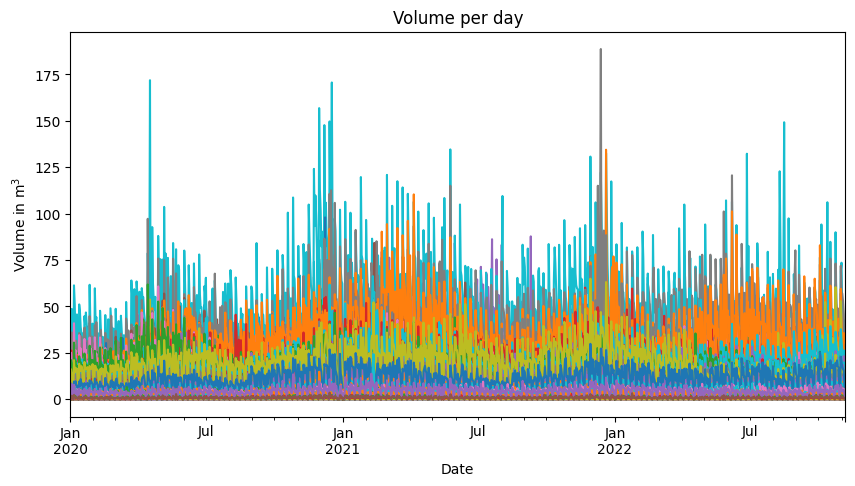

In [10]:
df.loc[df['volume_per_pc3'] > 200, 'volume_per_pc3'] = 55
df.pivot_table(index='datum',columns='pc3',values='volume_per_pc3',aggfunc='sum').plot(legend=False, xlabel='Date',ylabel='Volume in m$^3$', title='Volume per day', figsize=(10,5))

<AxesSubplot:title={'center':'Average volume per day, per area'}, xlabel='Weekday', ylabel='Volume in m$^3$'>

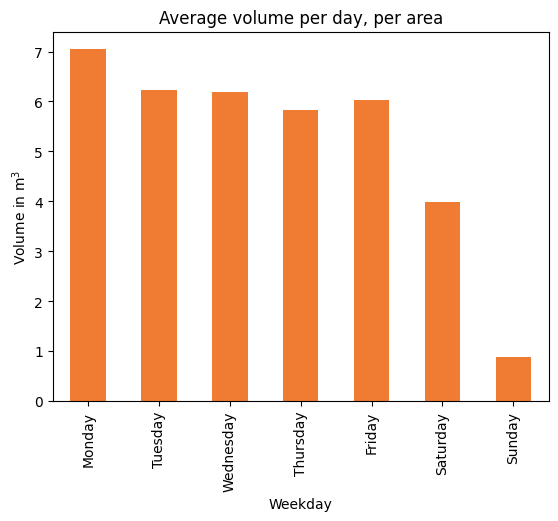

In [48]:
df =pd.read_csv('newdata.csv')
# df = pd.read_csv('with_outliers_newdata.csv')
df['datum']=pd.to_datetime(df['datum'])

x=df.groupby(['weekday']).agg({'volume_per_pc3': ['mean']})
x= pd.DataFrame(x)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x=x.loc[order]
x.plot(ylabel='Volume in m$^3$',xlabel='Weekday',title='Average volume per day, per area',legend=False,kind='bar', color='#f07c34')

In [ ]:
### Volume distribution per PC3 area

Text(0, 0.5, 'Frequency PC 3 areas')

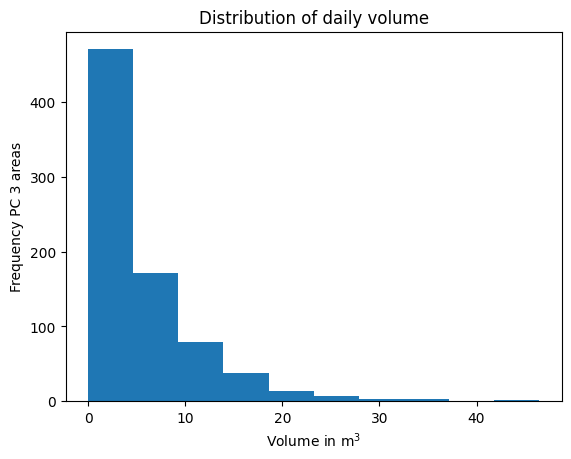

In [74]:
distribution = df.groupby(['pc3']).agg({'volume_per_pc3': ['sum']})
# adding volume per day column in the dataset 
distribution['daily'] = distribution.apply((lambda x: x/1000), axis=1)

ax= distribution['daily'].plot.hist(bins=10)
ax.set_title('Distribution of daily volume')
ax.set_xlabel("Volume in m$^3$")
ax.set_ylabel("Frequency PC 3 areas")
# ax.xticks(range(10))
# ax.show()

### heatmap

In [32]:
df.head()

datum  pc3  volume_per_pc3    weekday  lockdown
0 2020-01-01  101           0.155  Wednesday         0
1 2020-01-01  102           0.192  Wednesday         0
2 2020-01-01  105           0.113  Wednesday         0
3 2020-01-01  106           0.156  Wednesday         0
4 2020-01-01  107           1.454  Wednesday         0

In [11]:
pivot = df.pivot_table(index='datum',columns='pc3',values='volume_per_pc3',aggfunc='sum',  fill_value=0).reset_index()

In [80]:
# add features 

# pivot['weekday'] = pivot['datum'].dt.day_name()
pivot['day_nr'] = pivot['datum'].dt.dayofweek
pivot['year'] = pd.DatetimeIndex(pivot['datum']).year
pivot['month'] = pd.DatetimeIndex(pivot['datum']).month
pivot['week_nr'] =pivot['datum'].dt.isocalendar().week

# lockdown
conditions = [
    (pivot['datum'] >= '2020-12-14' ) & (pivot['datum'] <= '2021-02-07'),
    (pivot['datum'] >= '2021-02-08') & (pivot['datum'] <= '2021-04-28')]
choices = [1, 2]
pivot['lockdown'] = np.select(conditions, choices, default=0)

In [81]:
pivot.head()

pc3      datum     101    102    103    104     105     106     107     108  \
0   2020-01-01   0.155  0.192  0.000  0.000   0.113   0.156   1.454   0.507   
1   2020-01-02  26.745  6.187  8.805  0.011  27.276  25.450  27.823   9.122   
2   2020-01-03  32.748  5.167  8.931  0.270  25.743  23.523  22.460   9.851   
3   2020-01-04  21.864  5.913  8.310  0.000  27.738  20.777  28.651  10.377   
4   2020-01-05   5.924  1.191  2.827  0.000   7.220   3.369   8.055   6.084   

pc3     109    110     111    112    113    114    115    116    117     118  \
0     0.132  0.034   0.253  0.000  0.109  0.000  0.000  0.000  0.068   0.161   
1    16.908  9.523  12.265  2.117  5.152  3.098  0.544  1.952  3.901  18.761   
2    16.517  9.157  11.265  1.946  4.831  1.616  0.458  2.344  2.632  17.957   
3    17.024  9.449   9.600  2.049  4.763  2.199  0.739  2.068  3.086  12.831   
4     1.986  0.416   1.884  0.000  1.159  0.000  0.000  0.000  0.294   3.647   

pc3    119     121    122    123    124    125  ...    980  981    982    983  \
0    0.000   0.000  1.084  0.000  0.000  0.000  ...  0.000  0.0  0.000  0.000   
1    2.255  35.847  3.770  2.802  1.815  2.873  ...  3.279  0.0  0.271  0.228   
2    1.420  15.896  3.748  3.027  2.001  2.146  ...  2.942  0.0  0.235  0.180   
3    2.217  10.807  3.937  1.440  1.844  2.598  ...  2.178  0.0  0.224  0.250   
4    0.000   2.209  2.509  0.922  0.749  1.557  ...  0.399  0.0  0.000  0.000   

pc3    984  985    986    987    988    989    990    991    992    993  \
0    0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.138   
1    0.855  0.0  3.050  0.028  1.031  0.033  3.364  0.595  0.000  2.059   
2    0.708  0.0  2.417  0.009  0.295  0.046  2.761  0.952  0.000  2.016   
3    1.148  0.0  1.347  0.000  0.325  0.027  2.050  0.739  0.001  1.773   
4    0.000  0.0  0.130  0.000  0.000  0.000  0.969  0.000  0.000  0.318   

pc3    994    995    996    997    998    999  day_nr  year  month  week_nr  \
0    0.000  0.000  0.000  0.000  0.000  0.000       2  2020      1        1   
1    0.353  2.054  1.151  0.335  2.584  0.564       3  2020      1        1   
2    1.105  2.953  0.764  0.261  8.013  1.777       4  2020      1        1   
3    0.322  1.483  0.751  0.148  2.123  0.519       5  2020      1        1   
4    0.092  0.692  0.150  0.064  0.034  0.034       6  2020      1        1   

pc3  lockdown  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 790 columns]

<AxesSubplot:xlabel='pc3', ylabel='pc3'>

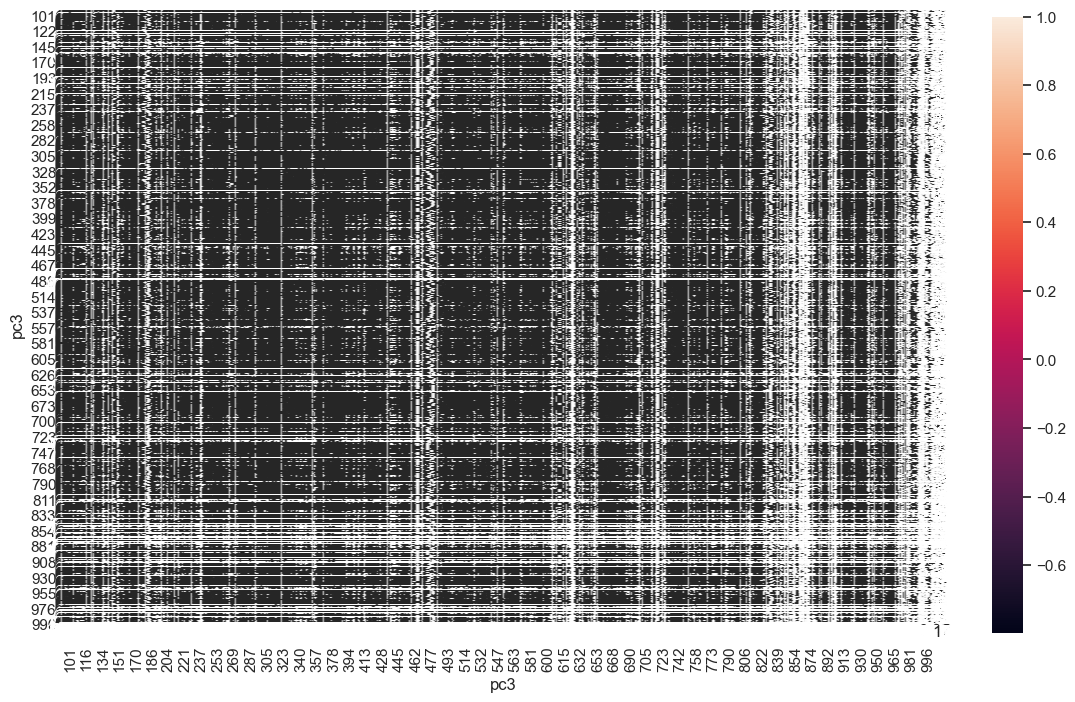

In [87]:
# https://towardsdatascience.com/developing-a-timeseries-heatmap-in-python-using-plotly-fcf1d69575a3 

# creating the plot
# pivot=pivot.drop(['datum'], axis=1)

corr = pivot.corr()
sns.heatmap(corr, annot = True)

# sns.heatmap(pivot, cmap ='RdYlGn', linewidths = 0.30, annot = True)


### EDA for Amersfoort (PC381)

In [53]:
df =pd.read_csv('newdata.csv')

df['datum']=pd.to_datetime(df['datum'])
df['year'] = pd.DatetimeIndex(df['datum']).year
df['month'] = pd.DatetimeIndex(df['datum']).month

pc381 = df[df.pc3 == 381]

In [29]:
pc381.head(3)

datum  pc3  volume_per_pc3   weekday  lockdown  year  month  \
251924 2020-01-03  381          12.477    Friday         0  2020      1   
251925 2020-01-04  381          12.739  Saturday         0  2020      1   
251926 2020-01-05  381           4.108    Sunday         0  2020      1   

        volume diff  
251924       -4.553  
251925        0.262  
251926       -8.631

<AxesSubplot:title={'center':'Volume per day in Amersfoort'}, xlabel='Date', ylabel='Volume in m$^3$'>

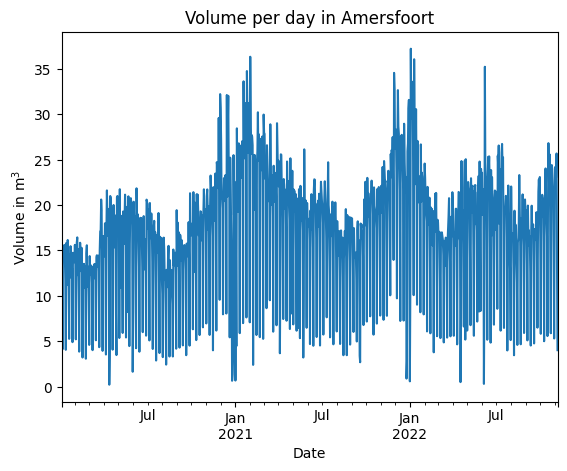

In [32]:
pc381.plot( x= 'datum',y= 'volume_per_pc3' ,legend=False, xlabel='Date',ylabel='Volume in m$^3$', title='Volume per day in Amersfoort')

In [59]:
print ('Let us use the Augmented Dickey-Fuller Test, a well-known statistical test that can help determine if the time series is stationary. The ADF test is a type of unit root test. Unit roots are a cause for non-stationarity, the ADF test will test if the unit root is present. The Null Hypothesis states there is the presence of a unit root. If the P-Value is less than the Significance Level defined, we reject the Null Hypothesis that the time series contains a unit root. In other words, by rejecting the Null hypothesis, we can conclude that the time series is stationary.')
print()

# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(pc381['volume_per_pc3'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

# print()
# print ('Since the series isn’t stationary, we will commit to the first-order differencing of electricity values and perform the ADF test again on the dataset.')

# data['Electricity First Difference'] = data['Electricity'] - data['Electricity'].shift(1)
# data.dropna(subset = ["Electricity First Difference"], inplace=True)
# data.head()

print ()
print ('The p-value is now less than 0.05, meaning that we can reject the null hypothesis i.e. the time series is stationary. Next, let us visualize the differenced series.')

Let us use the Augmented Dickey-Fuller Test, a well-known statistical test that can help determine if the time series is stationary. The ADF test is a type of unit root test. Unit roots are a cause for non-stationarity, the ADF test will test if the unit root is present. The Null Hypothesis states there is the presence of a unit root. If the P-Value is less than the Significance Level defined, we reject the Null Hypothesis that the time series contains a unit root. In other words, by rejecting the Null hypothesis, we can conclude that the time series is stationary.

ADF Statistic: -3.0692515626661567
p-value: 0.028913989230312305

The p-value is now less than 0.05, meaning that we can reject the null hypothesis i.e. the time series is stationary. Next, let us visualize the differenced series.


Now, let us use the Statsmodels library to build auto-correlation (ACF) and partial auto-correlation plots from the differenced series. ACF describes how well the present value of the series is related to its past values while PACF finds a correlation of the residuals with the next lag value.



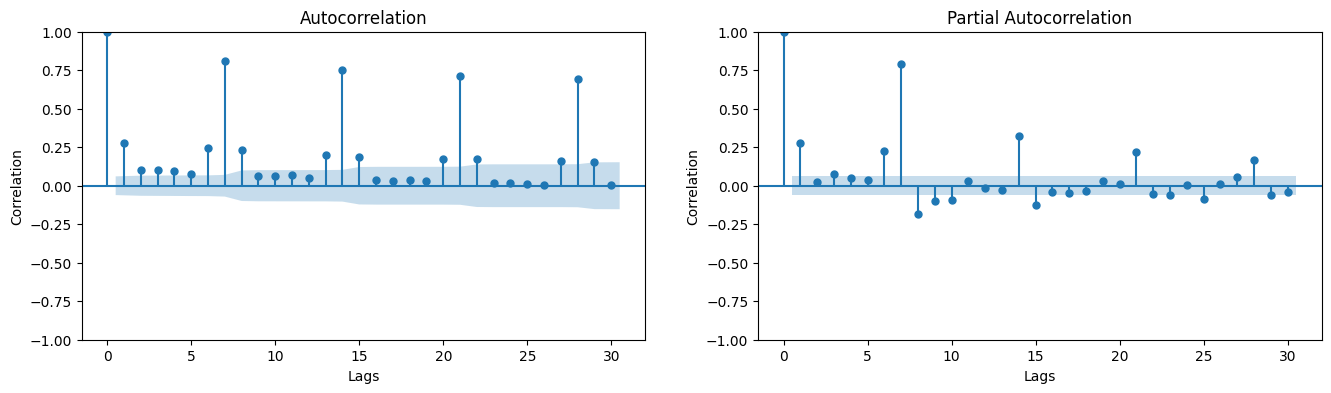

In [58]:
print ('Now, let us use the Statsmodels library to build auto-correlation (ACF) and partial auto-correlation plots from the differenced series. ACF describes how well the present value of the series is related to its past values while PACF finds a correlation of the residuals with the next lag value.')
print ()

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
fig = plt.xlabel("Lags")
fig = plt.ylabel("Correlation")
fig = sm.graphics.tsa.plot_acf(pc381['volume_per_pc3'].dropna(),lags=30,ax=ax1)

ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(pc381['volume_per_pc3'].dropna(),lags=30,ax=ax2)
fig = plt.xlabel("Lags")
fig = plt.ylabel("Correlation")

In [60]:
import statsmodels.api as sm

### train validation test split

In [50]:
df =pd.read_csv('newdata.csv')

df= df.loc[df['volume_per_pc3'] < 250]

df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index(df['datum'])
df = df.sort_index()

training = df["01/01/2020":"01/24/2021"] # untill lockdown
training = pd.concat([training, df["02/08/2021":"09/06/2022"]], axis=0) # after lockdown

validation = df.loc["01/25/2021":"01/31/2021"] #lockdown
validation = pd.concat([validation, df["09/07/2022":"10/08/2022"]], axis=0)

test =  df["02/01/2021":"02/07/2021"]# lockdown
test = pd.concat([test, df["10/07/2022":"11/06/2022"]], axis=0)
 
# mm/dd/yyyy

In [40]:
df.head(1)

datum  pc3  volume_per_pc3    weekday  lockdown
datum                                                          
2020-01-01 2020-01-01  101           0.155  Wednesday         0

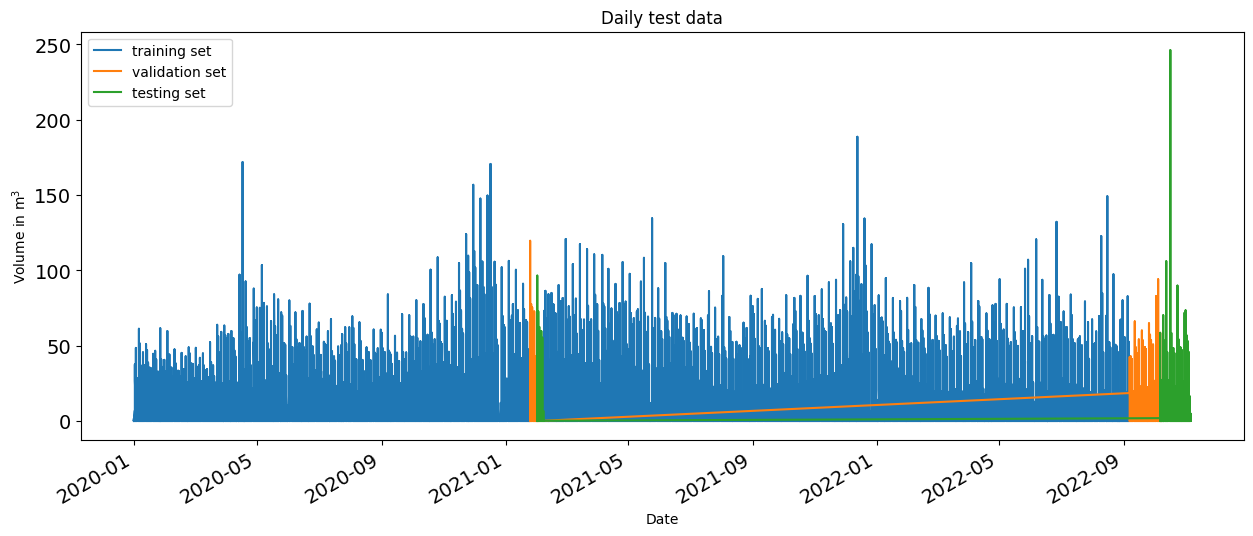

In [38]:
training.volume_per_pc3.plot(figsize=(15,6), title= 'Daily training set', fontsize=14, label='training set') 
validation.volume_per_pc3.plot(figsize=(15,6), title= 'Daily validation set', fontsize=14, label='validation set') 
test.volume_per_pc3.plot(figsize=(15,6), title= 'Daily test data', fontsize=14, label='testing set') 
plt.xlabel("Date") 
plt.ylabel("Volume in m$^3$") 
plt.legend(loc='best')
plt.show()

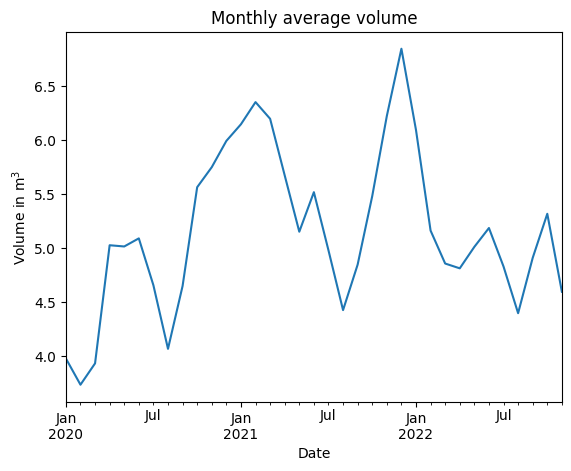

In [51]:
monthly_resampled_data = df.volume_per_pc3.resample('M').mean()
monthly_resampled_data.plot(title='Monthly average volume')
plt.xlabel("Date") 
plt.ylabel("Volume in m$^3$") 
plt.show()

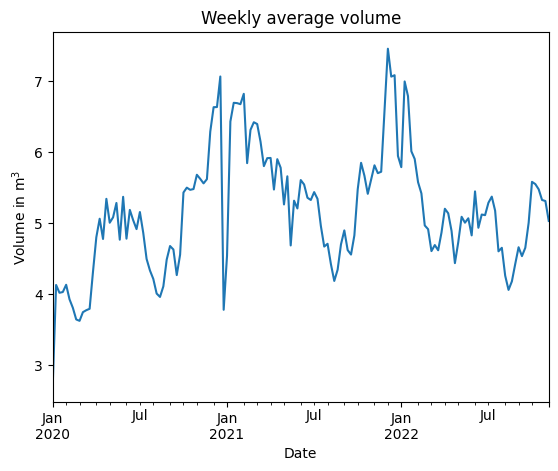

In [45]:
monthly_resampled_data = df.volume_per_pc3.resample('w').mean()
monthly_resampled_data.plot(title='Weekly average volume')
plt.xlabel("Date") 
plt.ylabel("Volume in m$^3$") 
plt.show()